In [204]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from matplotlib.pyplot import figure

import requests
import json
from api_keys import g_key
import gmaps



In [205]:
#Importing median_income data
income_data=pd.read_csv("median_income.csv")

In [206]:
#Previewing data
income_data.head()

,GEO_ID,NAME,S1901_C01_001E,S1901_C01_001M,S1901_C01_002E,S1901_C01_002M,S1901_C01_003E,S1901_C01_003M,S1901_C01_004E,S1901_C01_004M,...,S1901_C04_012E,S1901_C04_012M,S1901_C04_013E,S1901_C04_013M,S1901_C04_014E,S1901_C04_014M,S1901_C04_015E,S1901_C04_015M,S1901_C04_016E,S1901_C04_016M
0,id,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000",Margin of Error!!Households!!Total!!Less than ...,"Estimate!!Households!!Total!!$10,000 to $14,999","Margin of Error!!Households!!Total!!$10,000 to...","Estimate!!Households!!Total!!$15,000 to $24,999","Margin of Error!!Households!!Total!!$15,000 to...",...,Estimate!!Nonfamily households!!Median income ...,Margin of Error!!Nonfamily households!!Median ...,Estimate!!Nonfamily households!!Mean income (d...,Margin of Error!!Nonfamily households!!Mean in...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...
1,0500000US01001,"Autauga County, Alabama",21397,325,6.6,1.2,5.5,1.1,10.4,1.5,...,31080,4646,44633,4034,(X),(X),(X),(X),32.8,(X)
2,0500000US01003,"Baldwin County, Alabama",80930,1127,5.0,0.6,4.6,0.6,8.8,1.0,...,33296,1648,45999,2258,(X),(X),(X),(X),29.2,(X)
3,0500000US01005,"Barbour County, Alabama",9345,313,14.9,2.2,8.5,1.5,17.6,2.6,...,18123,1686,26919,3315,(X),(X),(X),(X),33.3,(X)
4,0500000US01007,"Bibb County, Alabama",6891,333,8.3,2.7,8.0,2.7,13.0,3.1,...,23211,3496,38032,7953,(X),(X),(X),(X),36.8,(X)


In [207]:
#Making smaller dataframe
inc_df=income_data[["NAME","S1901_C01_012E"]]
inc_df.head()

,NAME,S1901_C01_012E
0,Geographic Area Name,Estimate!!Households!!Median income (dollars)
1,"Autauga County, Alabama",58731
2,"Baldwin County, Alabama",58320
3,"Barbour County, Alabama",32525
4,"Bibb County, Alabama",47542


In [208]:
#Dropping first row
inc_df.drop(0,inplace=True)

In [209]:
len(inc_df)

3220

In [210]:
#Previewing dataframe
inc_df.head()

,NAME,S1901_C01_012E
1,"Autauga County, Alabama",58731
2,"Baldwin County, Alabama",58320
3,"Barbour County, Alabama",32525
4,"Bibb County, Alabama",47542
5,"Blount County, Alabama",49358


In [211]:
#Renaming column headers
inc_df=inc_df.rename(columns={"NAME": "County", 
                   "S1901_C01_012E": "Median_Income"})

In [212]:
#Previewing clean dataframe
inc_df.head()

,County,Median_Income
1,"Autauga County, Alabama",58731
2,"Baldwin County, Alabama",58320
3,"Barbour County, Alabama",32525
4,"Bibb County, Alabama",47542
5,"Blount County, Alabama",49358


In [213]:
#Importing hospital data
clean_hosp=pd.read_csv("clean_hosp.csv")
clean_hosp.head()

,Unnamed: 0,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,...,Hospital overall rating,Mortality,Safety of care,Readmission,Patient experience,Effectiveness of care,Timeliness of care,Medical imaging use,Location,Hosp_Owner_Code
0,0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,...,3.0,Lower,Average,Higher,Average,Average,Higher,Lower,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n",GOV_FSCD
1,1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,...,3.0,Lower,Average,Average,Average,Average,Higher,Average,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n",PRP
2,2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,...,4.0,Average,NaN,Average,NaN,Average,Average,NaN,"209 NORTH MAIN STREET\nWEDOWEE, AL\n",GOV_FSCD
3,3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,...,NaN,NaN,NaN,NaN,NaN,Lower,Average,NaN,"508 GREEN STREET\nGREENSBORO, AL\n",GOV_L
4,4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,...,3.0,Lower,Higher,Average,Average,Average,Average,Average,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n",PRP


In [214]:
#Making new dataframe for statecodes and their expansion
state_codes=pd.DataFrame({
    'State_Codes':["IL", "IN", "MI", "IA", "MO", "OH", "ND", "SD", "NE", "KS","MN","WI","AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","KY","LA","MD","ME","MA","MS","MT","NV","NH","NJ","NM","NY","NC","OK","OR","PA","RI","SC","TN","TX","UT","VT","VA","WA","WV","WY","GU","DC","VI","PR","AS","MP"],
    'State_Names':["Illinois","Indiana","Michigan","Iowa","Missouri","Ohio","North Dakota","South Dakota","Nebraska","Kansas","Minnesota","Wisconsin","Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Kentucky","Louisiana","Maryland","Maine","Massachusetts","Mississippi","Montana","Nevada","New Hampshire","New Jersey","New Mexico","New York","New Carolina","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wyoming","Guam","District of Columbia","Virgin Islands","Puerto Rico","American Samoa","Northern Mariana Islands"]
    
})
state_codes.head()

,State_Codes,State_Names
0,IL,Illinois
1,IN,Indiana
2,MI,Michigan
3,IA,Iowa
4,MO,Missouri


In [215]:
#Making state names list for hospital dataframe
State_Name=[]
for idx,row in clean_hosp.iterrows():
    for i, r in state_codes.iterrows():
        if row['State']==r['State_Codes']:
            State_Name.append(r['State_Names'])


In [216]:
len(State_Name)

4812

In [217]:
len(clean_hosp)
#clean_hosp['State'].value_counts()

4812

In [218]:
#Adding State name column to hospital dataframe
clean_hosp['State Name']=State_Name
clean_hosp.head()

,Unnamed: 0,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,...,Mortality,Safety of care,Readmission,Patient experience,Effectiveness of care,Timeliness of care,Medical imaging use,Location,Hosp_Owner_Code,State Name
0,0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,...,Lower,Average,Higher,Average,Average,Higher,Lower,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n",GOV_FSCD,Alabama
1,1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,...,Lower,Average,Average,Average,Average,Higher,Average,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n",PRP,Alabama
2,2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,...,Average,NaN,Average,NaN,Average,Average,NaN,"209 NORTH MAIN STREET\nWEDOWEE, AL\n",GOV_FSCD,Alabama
3,3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,...,NaN,NaN,NaN,NaN,Lower,Average,NaN,"508 GREEN STREET\nGREENSBORO, AL\n",GOV_L,Alabama
4,4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,...,Lower,Higher,Average,Average,Average,Average,Average,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n",PRP,Alabama


In [219]:
#Making County Address Column to compare with median income dataframe
clean_hosp['County Address']=clean_hosp['County Name']+" County"+","+" "+clean_hosp['State Name']

In [220]:
#Converting to title case
clean_hosp['County Address']=clean_hosp['County Address'].str.title()
#Special case for Dekalb county
clean_hosp['County Address']=clean_hosp['County Address'].replace('De Kalb County, Alabama','Dekalb County, Alabama')

In [221]:
#Previewing dataframe
clean_hosp.head()

,Unnamed: 0,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,...,Safety of care,Readmission,Patient experience,Effectiveness of care,Timeliness of care,Medical imaging use,Location,Hosp_Owner_Code,State Name,County Address
0,0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,...,Average,Higher,Average,Average,Higher,Lower,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n",GOV_FSCD,Alabama,"Marshall County, Alabama"
1,1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,...,Average,Average,Average,Average,Higher,Average,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n",PRP,Alabama,"Dekalb County, Alabama"
2,2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,...,NaN,Average,NaN,Average,Average,NaN,"209 NORTH MAIN STREET\nWEDOWEE, AL\n",GOV_FSCD,Alabama,"Randolph County, Alabama"
3,3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,...,NaN,NaN,NaN,Lower,Average,NaN,"508 GREEN STREET\nGREENSBORO, AL\n",GOV_L,Alabama,"Hale County, Alabama"
4,4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,...,Higher,Average,Average,Average,Average,Average,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n",PRP,Alabama,"Madison County, Alabama"


In [222]:
#Finding hospitals in each county
n_hospitals=[]
for idx,row in inc_df.iterrows():
    count=0
    for i, r in clean_hosp.iterrows():
        if row['County']==r['County Address']:
            count=count+1
    n_hospitals.append(count)


In [223]:
inc_df["Hospitals"]=n_hospitals

In [224]:
#For plotting scatter plot for number of hospitals with median income
y_axis=inc_df['Hospitals'].astype(float)
x_axis=inc_df["Median_Income"].astype(float)
x_axis=x_axis/1000


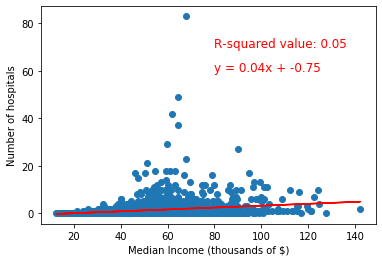

In [225]:
#Importing linregress
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values=[]

rsq=rvalue*rvalue
rr=f"R-squared value: {round(rsq,2)}"
#Finding the linear regression predicted average tumor volume
for x_value in x_axis:
    regress_values.append(x_value*slope+intercept)
    
#Building the line equation for annotation
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

#Making the scatter plot
plt.scatter(x_axis,y_axis)

#Making the line plot for the linear regression equation
plt.plot(x_axis,regress_values,"r-")

#Providing the annotation of the line equation
plt.annotate(line_eq,(80,60),fontsize=12,color="red")
plt.annotate(rr,(80,70),fontsize=12,color="red")
plt.xlabel('Median Income (thousands of $)')
plt.ylabel('Number of hospitals')
plt.savefig("linreg_inc.png")
plt.show()

In [226]:
#Reading in population data
pop_df=pd.read_csv("population.csv")
#Dropping first row
pop_df.drop(0,inplace=True)
#Renaming column headers
pop_df=pop_df.rename(columns={"NAME": "County", 
                   "B01003_001E": "Population"})
pop_df=pop_df[['County','Population']]
pop_df.head()


,County,Population
1,"Autauga County, Alabama",55380
2,"Baldwin County, Alabama",212830
3,"Barbour County, Alabama",25361
4,"Bibb County, Alabama",22493
5,"Blount County, Alabama",57681


In [227]:
#For plotting scatter plot for number of hospitals with population
y_axis=inc_df['Hospitals'].astype(float)
x_axis=pop_df["Population"].astype(float)
x_axis=x_axis/1000000

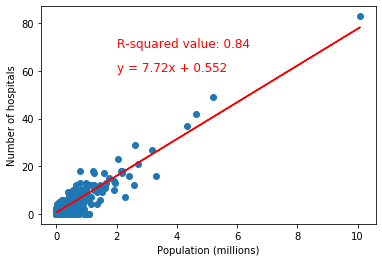

In [228]:
#Importing linregress
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values=[]

rsq=rvalue*rvalue
rr=f"R-squared value: {round(rsq,2)}"
#Finding the linear regression predicted average tumor volume
for x_value in x_axis:
    regress_values.append(x_value*slope+intercept)
    
#Building the line equation for annotation
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

#Making the scatter plot
plt.scatter(x_axis,y_axis)

#Making the line plot for the linear regression equation
plt.plot(x_axis,regress_values,"r-")

#Providing the annotation of the line equation
plt.annotate(line_eq,(2,60),fontsize=12,color="red")
plt.annotate(rr,(2,70),fontsize=12,color="red")
plt.xlabel('Population (millions)')
plt.ylabel('Number of hospitals')
plt.savefig("linreg_pop.png")
plt.show()

In [229]:
#Making address for google search API
for index, row in inc_df.iterrows():
    row['County']=row['County']+',USA'

In [230]:
#Storing coordinates of all counties and the median income
base_url = "https://maps.googleapis.com/maps/api/geocode/json"
latitudes=[]
longitudes=[]
params = {"key": g_key}
income=[]

for index, row in inc_df.iterrows():
    address=row
    params['address'] = address
    try:
        my_geo = requests.get(base_url, params).json()
        lat = my_geo["results"][0]["geometry"]["location"]["lat"]
        lng = my_geo["results"][0]["geometry"]["location"]["lng"]

        latitudes.append(lat)

        longitudes.append(lng)
        
        income.append(row['Median_Income'])
    except:
        print(f"Error locating address: {address} ")

print("End of Loop")

End of Loop


In [231]:
#Building dataframe
income=inc_df['Median_Income'].astype(float)

county_inc=pd.DataFrame({"Lat": latitudes,
                           "Lng" :longitudes,
                         "Income": income
                      })

county_inc.head()

,Lat,Lng,Income
1,32.579182,-86.499655,58731.0
2,30.601074,-87.776333,58320.0
3,31.817290,-85.354965,32525.0
4,32.956280,-87.142289,47542.0
5,34.014515,-86.499655,49358.0


In [232]:
#Writing coun data  to csv
county_inc.to_csv("county_inc.csv")

In [233]:
#Importing county coordinates and hospital coordinates
county_inc=pd.read_csv("county_inc.csv")
all_addr=pd.read_csv("all_addr.csv")
all_addr.head()

,Unnamed: 0,Lat,Lng
0,0,34.221688,-86.160710
1,1,34.441975,-85.755014
2,2,33.310670,-85.485005
3,3,32.695544,-87.586908
4,4,34.720758,-86.574990


In [235]:
len(pop_df['Population'])


3220

In [237]:
len(county_inc['Income'])


3220

In [238]:
#Plotting median income as heat map and hospitals as markers on map
locations=all_addr[['Lat','Lng']]
locs=county_inc[['Lat','Lng']]
weights=county_inc['Income']

figure_layout = {
    'width': '800px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
gmaps.configure(api_key=g_key)
fig = gmaps.figure(layout=figure_layout)
#fig = gmaps.figure()

hosp_layer = gmaps.symbol_layer(
   locations, fill_color='rgba(0, 0, 150, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2

)

heat_layer = gmaps.heatmap_layer(locs, weights=weights, 
                                 dissipating=False, max_intensity=300000,
                                 point_radius = 1)
fig.add_layer(heat_layer)

fig.add_layer(hosp_layer)
plt.savefig("hospitals_inc.png")
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

<Figure size 432x288 with 0 Axes>

In [241]:
#Plotting population as heat map and hospitals as markers on map. 
#Note the counties in pop_df are in the same order as in county_df  as they are from the same source census.gov
#Therefore, same coordinates from county_df work 
locations=all_addr[['Lat','Lng']]
locs=county_inc[['Lat','Lng']]
weights=pop_df['Population']

figure_layout = {
    'width': '800px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
gmaps.configure(api_key=g_key)
fig = gmaps.figure(layout=figure_layout)
#fig = gmaps.figure()

hosp_layer = gmaps.symbol_layer(
   locations, fill_color='rgba(0, 0, 75, 0.4)',
    stroke_color='rgba(0, 0, 75, 0.4)', scale=2

)

heat_layer = gmaps.heatmap_layer(locs, weights=weights, 
                                 dissipating=False, max_intensity=1000000,
                                 point_radius = 1)
fig.add_layer(heat_layer)

fig.add_layer(hosp_layer)
plt.savefig("hospitals_pop.png")
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

<Figure size 432x288 with 0 Axes>